<a href="https://colab.research.google.com/github/SUPAGORN0306/229352-StatisticalLearning/blob/main/LAB03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [47]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



In [48]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-23 14:20:40--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-23 14:20:40 (12.3 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-23 14:20:40--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29

In [49]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [50]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [54]:
# TODO: enter code here
M = np.random.rand(50, 85)
# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data
M = M - np.mean(M, axis=0)
# 2. หา covariance matrix
cov_m = np.cov(M, rowvar=False)
# 3. Decompose the covariance matrix UDU^T
specA = np.linalg.eigh(cov_m)
# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด
D = specA[0]
U = specA[1]
l_2 = D[-1] #eigenvalue ที่มีค่าสูงที่สุด
l_3 = D[-2] #eigenvalue ที่มีค่ารองลงมา
U_23 = U[:,-2:]
# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U
M2 = np.dot(M, U_23)
# Result: a (50,2) matrix
print(M2)

[[-0.89887064 -0.73276045]
 [ 0.08943314  1.00262482]
 [-0.23097104 -0.57751677]
 [-0.23259433  0.08425013]
 [ 0.9448369  -0.11294608]
 [ 0.06852465  0.35410735]
 [ 0.29040802  0.19744216]
 [ 1.14357253  0.0533417 ]
 [-0.52195407 -0.52023525]
 [-0.7589236   0.19007492]
 [-0.47422618  0.20281237]
 [ 0.23188958  0.34689762]
 [-0.66295375  0.62957996]
 [-0.44525832 -0.90802255]
 [ 0.73018475 -0.22022473]
 [-0.34544724 -0.24075965]
 [-0.7083882  -0.22798134]
 [ 1.14499271  0.10208756]
 [-1.09497108  0.79777788]
 [-0.27677703 -0.31819027]
 [ 0.40749709 -0.46018864]
 [ 0.91621527 -0.04093954]
 [-0.48336696  0.16713313]
 [ 0.45054588  0.79658036]
 [-0.51120865  0.46749899]
 [-0.19765956 -1.2776425 ]
 [ 0.09184678  1.69925839]
 [ 0.89542385 -0.01757069]
 [-1.09487656 -1.07917892]
 [ 0.68562851 -0.49948695]
 [-0.28839576  0.31486516]
 [-0.38684936  0.91653256]
 [-1.02190697 -0.03822255]
 [-0.19233755 -1.20303019]
 [ 0.74554648 -0.64424919]
 [-0.73221624  0.59035991]
 [ 0.39476205 -0.27689065]
 

#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [55]:
#TODO (optional): enter code here
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
B2 = pca.fit_transform(data_c)

print(B2)

[[ 0.44644063  1.27027356]
 [ 0.75960889 -0.46266486]
 [ 0.25690337  0.57280367]
 [ 0.18726363 -1.11162765]
 [-0.58575799 -0.7439369 ]
 [ 0.32413675  0.12060558]
 [-1.1477593  -0.68762871]
 [ 0.24839371 -0.22256211]
 [ 0.67554403  0.72266537]
 [ 0.01671794  0.05622413]
 [-0.17599132 -0.21765162]
 [-0.55593784 -0.11828774]
 [-0.25217901  0.02847814]
 [ 1.59265996  1.19790884]
 [-0.22305133 -0.7720848 ]
 [-0.11187924 -0.38576855]
 [ 1.35980372 -0.03869198]
 [-0.21457641 -0.13830091]
 [ 0.03857742  0.95632532]
 [-0.63528192  0.08040113]
 [-0.29976908 -0.58213383]
 [-1.13300356  1.10417344]
 [-1.2780392   0.47636555]
 [-0.38847001  0.344382  ]
 [ 0.29750007 -0.86110397]
 [ 0.89441346  0.15931737]
 [-0.59458214  1.05340259]
 [ 0.47081056 -0.90498147]
 [-0.54335028 -0.46344039]
 [-0.1418135   0.5200851 ]
 [ 0.91044086 -0.02210683]
 [ 0.4956585   0.50792079]
 [-0.71500243 -0.11803498]
 [ 0.0781942   0.23705184]
 [ 0.57469719 -0.5403612 ]
 [-0.22398654  0.77673058]
 [ 1.13139203 -0.40639799]
 

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

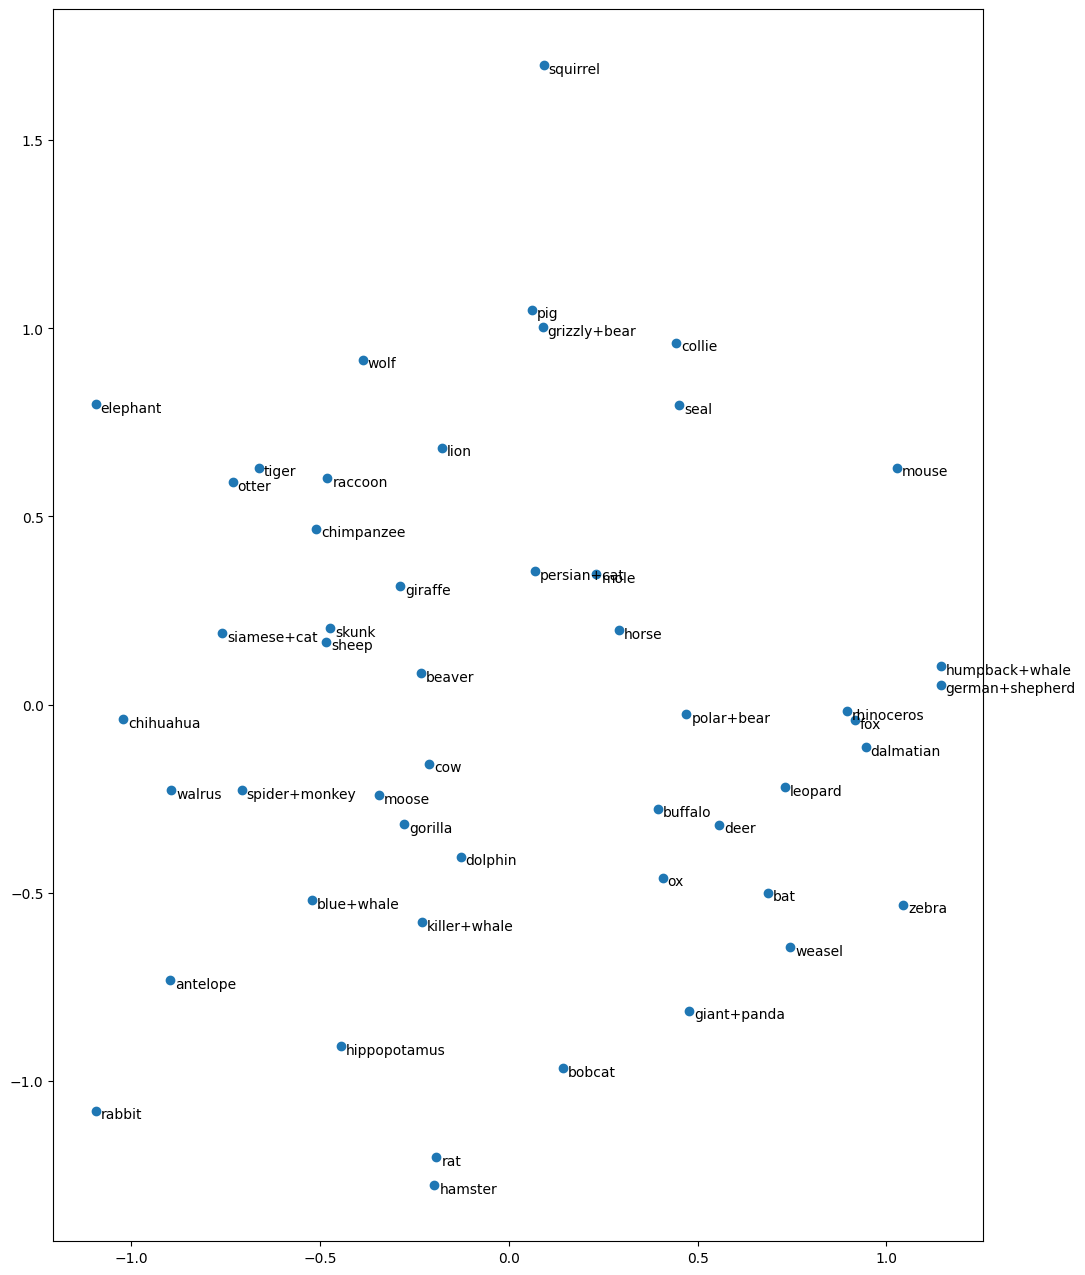

In [56]:
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter(M2[:,0], M2[:,1]);  #TODO: 1st column of your 50x2 matrix, #TODO: 2nd column of your 50x2 matrix )

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
  plt.annotate(
         classes[i,1],
          xy=(M2[i,0], M2[i,1]),
              xytext=(5, -8),
              textcoords='offset pixels')


plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1. กลุ่มสัตว์ที่มุมขวาบน ตัวอย่างเช่น pig, grizzly+bear, collie  มีลักษณะที่เหมือนกันคือ ปรับตัวอยู่ใกล้มนุษย์ได้
2. กลุ่มสัตว์ที่มุมซ้ายบน ตัวอย่างเช่น tiger, otter, raccoon,shimpanzee มีลักษณะที่เหมือนกันคือ ปีนป่ายและใช้มือเก่ง
3. กลุ่มสัตว์ที่มุมซ้ายกลาง ตัวอย่างเช่น siamese+cat, skunk, sheep  มีลักษณะที่เหมือนกันคือ สัตว์เลี้ยงใกล้ชิดคน
4. กลุ่มสัตว์ที่มุมล่างสุด ตัวอย่างเช่น rat, hamster มีลักษณะที่เหมือนกันคือ ตัวเล็กและขยายพันธุ์เร็ว